In [129]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from time import process_time
from typing import List 
from dataclasses import dataclass
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [51]:
x = sp.Symbol('x')
y = sp.lambdify(x, sp.diff(x*sp.exp(x), x))
y(1)

5.43656365691809

In [74]:
class Function:
    
    def __init__(self, f):
        x = sp.Symbol('x')
        self.f = sp.lambdify(x, f)
        self.g = sp.lambdify(x, f.diff(x))
        self.h = sp.lambdify(x, f.diff(x, 2))
    
    def calculate(self, x):
        return self.f(x)
    
    def gradient(self, x):
        return self.g(x)
    
    def hesse(self, x):
        return self.h(x)

In [174]:
@dataclass
class Result:
    point: float = None
    value: float = None
    solution_time: float = 0
    iteration_amount: float = None
    progress: List = None
    status: str = ''

    def print(self):
        print('Progress:\n')
        for i in range(self.iteration_amount + 1):
            print('It: {}, \t x = {:.3f}, f(x) = {:.5f}'.format(self.progress[i][0], self.progress[i][1], self.progress[i][2]))
        if self.status == 'Failure': 
            print('\nFailure: there is no convergence.')
        else:
            print('\nSolution: x = {:.3f}, f(x) = {:.3f}'.format(self.point, self.value))
            print('Time: {:.8f} s'.format(self.solution_time))


In [175]:
def armijo_line_search(f:Function, x):
    a = 0.5
    step = 1
    c = 1e-4
    p = - f.gradient(x)
    while not f.calculate(x + step * p) <= f.calculate(x) + c * step * f.gradient(x) * p:
        step *= a
    return step

In [176]:
def inexact_search(f:Function, a, b, tol:float, max_it=1000):
    start_time = process_time()
    res = Result()
    x = np.random.uniform(a, b)
    p = -f.gradient(x)
    it = 0
    res.progress = []
    res.progress.append([it, x, f.calculate(x)])
    # print('It: {}, \t x = {:.3f}, f = {:.3f}'.format(it, x, f.calculate(x)))
    while np.abs(p) >= tol and it < max_it:
        step = armijo_line_search(f, x)
        x += step * p
        p = -f.gradient(x)
        it += 1
        res.progress.append([it, x, f.calculate(x)])
        # print('It: {}, \t x = {:.3f}, f = {:.3f}'.format(it, x, f.calculate(x)))
    if it == max_it:
        print('Failure')
        res.status = 'Failure'
    else:
        # print('\nSolution: \t x = {:.3f}, f = {:.3f}'.format(x, f.calculate(x)))
        res.status = 'Success'
    res.point = x
    res.value = f.calculate(x)
    res.iteration_amount = it
    res.solution_time = process_time() - start_time
    return res

In [177]:
def plot_func(f:Function, x, a, b):
    i = np.linspace(a, b, 100)
    plt.plot(i, f.calculate(i))
    plt.plot(x, f.calculate(x), 'ro')
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    plt.title('Objective Function')

In [190]:
def plot_path(f:Function, a, b, res:Result):
    plot_func(f, res.progress[0][1], a, b)
    data = np.asarray(res.progress)
    plt.plot(data[:,1], data[:,2], linestyle='--', marker='o', color='orange')
    plt.plot(res.progress[0][1], res.progress[0][2], 'ro')

Progress:

It: 0, 	 x = 7.852, f(x) = 61.65471
It: 1, 	 x = 0.000, f(x) = 0.00000

Solution: x = 0.000, f(x) = 0.000
Time: 0.00008800 s


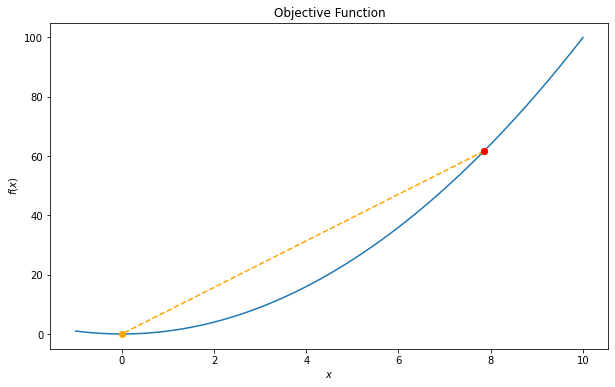

In [192]:
a = inexact_search(Function(x**2), -1, 10, 0.1)
a.print()
plot_path(Function(x**2), -1, 10, a)


Progress:

It: 0, 	 x = 1.336, f(x) = 1611.27064
It: 1, 	 x = -6.612, f(x) = 6.74842
It: 2, 	 x = -4.518, f(x) = 0.05385
It: 3, 	 x = -4.965, f(x) = 0.00000

Solution: x = -4.965, f(x) = 0.000
Time: 0.00009600 s


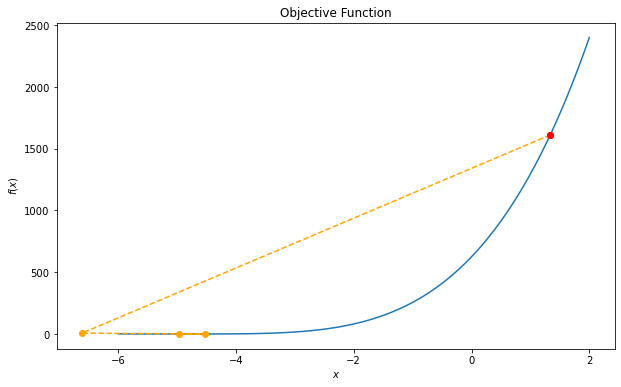

In [200]:
c = inexact_search(Function((x+5)**4), -6, 2, 0.001)
c.print()
plot_path(Function((x+5)**4), -6, 2, c)

Progress:

It: 0, 	 x = -1.787, f(x) = -0.29927
It: 1, 	 x = -1.655, f(x) = -0.31624
It: 2, 	 x = -1.530, f(x) = -0.33131
It: 3, 	 x = -1.415, f(x) = -0.34372
It: 4, 	 x = -1.314, f(x) = -0.35310
It: 5, 	 x = -1.230, f(x) = -0.35953
It: 6, 	 x = -1.163, f(x) = -0.36351
It: 7, 	 x = -1.112, f(x) = -0.36574
It: 8, 	 x = -1.075, f(x) = -0.36689
It: 9, 	 x = -1.049, f(x) = -0.36744
It: 10, 	 x = -1.032, f(x) = -0.36769
It: 11, 	 x = -1.021, f(x) = -0.36780
It: 12, 	 x = -1.013, f(x) = -0.36785
It: 13, 	 x = -1.008, f(x) = -0.36787
It: 14, 	 x = -1.005, f(x) = -0.36787
It: 15, 	 x = -1.003, f(x) = -0.36788
It: 16, 	 x = -1.002, f(x) = -0.36788

Solution: x = -1.002, f(x) = -0.368
Time: 0.00036900 s


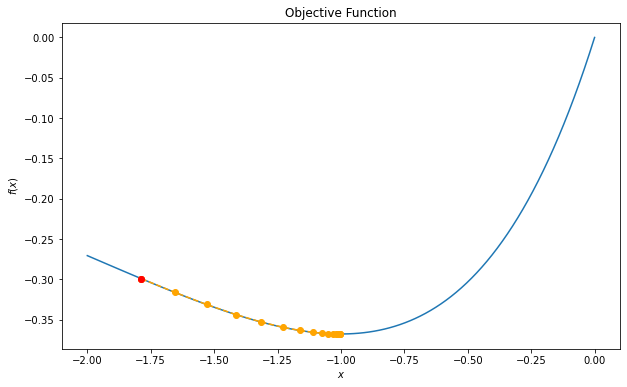

In [207]:
b = inexact_search(Function(x*sp.exp(x)), -2, 0, 0.001)
b.print()
plot_path(Function(x*sp.exp(x)), -2, 0, b)

In [156]:
inexact_search(Function(x*sp.exp(-x)), -2, 6, 0.1).print()

Progress:

It: 0, 	 x = 2.319, f(x) = 0.22816
It: 1, 	 x = 2.449, f(x) = 0.21161
It: 2, 	 x = 2.574, f(x) = 0.19625
It: 3, 	 x = 2.694, f(x) = 0.18218
It: 4, 	 x = 2.808, f(x) = 0.16937
It: 5, 	 x = 2.917, f(x) = 0.15777
It: 6, 	 x = 3.021, f(x) = 0.14728

Solution: x = 3.021, f(x) = 0.147
Time: 0.00035200 s
